In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datasets import load_dataset
import ast

#loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#cleaning data
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] =df["job_skills"].apply(lambda x :ast.literal_eval(x) if pd.notna(x) else x)

# How are in-demand skills trending for Data Analysts?

In [2]:
df_US_DA = df[(df["job_country"]=="United States") & (df["job_title_short"]=="Data Analyst")].copy()
df_US_DA["job_posted_month_no"] = df_US_DA["job_posted_date"].dt.month
df_US_DA_exploded = df_US_DA.explode("job_skills")
df_US_DA_pivot = df_US_DA_exploded.pivot_table(index="job_posted_month_no",columns="job_skills",aggfunc="size", fill_value = 0)
df_US_DA_pivot.loc["Total"] = df_US_DA_pivot.sum()
df_US_DA_pivot = df_US_DA_pivot[df_US_DA_pivot.loc["Total"].sort_values(ascending=False).index]
df_US_DA_pivot = df_US_DA_pivot.drop("Total")


In [3]:
DA_Totals = df_US_DA.groupby("job_posted_month_no").size()
df_US_percent = df_US_DA_pivot.div(DA_Totals/100,axis=0).reset_index()
df_US_percent["job_posted_month"] = pd.to_datetime(df_US_percent['job_posted_month_no'], format='%m').dt.strftime('%b')
df_US_percent.drop(columns="job_posted_month_no",inplace=True)
df_US_percent = df_US_percent.set_index("job_posted_month")
df_plot = df_US_percent.iloc[:,:5]
df_plot


job_skills,sql,excel,tableau,python,sas
job_posted_month,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166
Feb,51.730895,42.243632,27.367734,26.420640,19.790986
Mar,51.881634,42.795111,29.012544,27.066581,19.909939
Apr,53.231939,42.139197,29.575136,27.756654,21.524219
May,51.692369,42.419387,28.680152,27.017825,19.467254
Jun,50.360725,41.914482,28.646841,28.312511,17.314799
Jul,50.163430,40.722938,29.475101,27.648529,19.150163
Aug,51.462165,41.166717,29.409105,30.524570,19.234248
Sep,49.471869,38.823022,29.165768,26.492779,18.452253


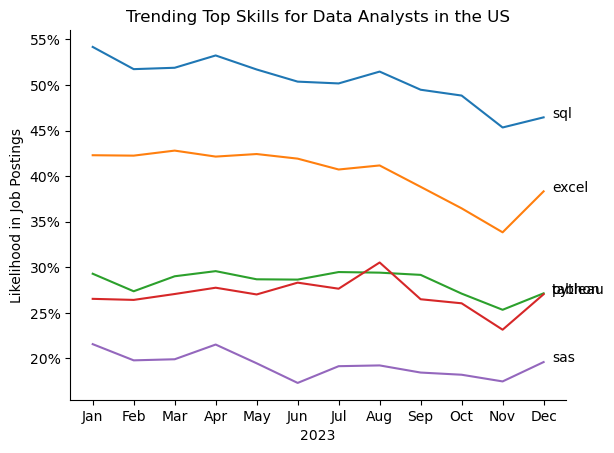

In [4]:
sns.lineplot(data=df_plot,dashes=False)
sns.despine()
plt.title("Trending Top Skills for Data Analysts in the US")
plt.ylabel("Likelihood in Job Postings")
plt.xlabel("2023")
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
for i in range(5):
    plt.text(11.2,df_plot.iloc[-1,i],df_plot.columns[i])


